<a href="https://colab.research.google.com/github/abdyraman/it-salaries-predictions/blob/main/it_salariespredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Import our input dataset
salaries_df = pd.read_csv('ds_salaries.csv')
salaries_df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1597,2023,SE,FT,Data Science Consultant,145000,USD,145000,US,0,US,M
2129,2022,SE,FT,Data Scientist,185900,USD,185900,US,0,US,M
102,2023,SE,FT,Data Analyst,65000,USD,65000,US,0,US,M
2924,2022,SE,FT,Data Scientist,191475,USD,191475,US,100,US,M
1461,2023,SE,FT,Data Scientist,154600,USD,154600,US,100,US,M


Data cleaning

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
cleaned_df = salaries_df.drop(['salary', 'salary_currency'], axis=1)
cleaned_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [ ]:
# Determine the number of unique values in each column.
unique_counts = cleaned_df.nunique()
unique_counts

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [ ]:
# Look at value counts for binning
jobtitle_counts = cleaned_df['job_title'].value_counts()
jobtitle_counts

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [ ]:
cutoff_value = 90
jobtitle_counts_to_replace = jobtitle_counts[jobtitle_counts < cutoff_value].index

# Replace in the dataframe
cleaned_df.loc[cleaned_df['job_title'].isin(jobtitle_counts_to_replace), 'job_title'] = "Other"

# Check the updated value counts
jobtitle_counts = cleaned_df['job_title'].value_counts()
print(jobtitle_counts)


Data Engineer                1040
Data Scientist                840
Other                         770
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Name: job_title, dtype: int64


In [ ]:
# Look at value counts for binning
empres_counts = cleaned_df['employee_residence'].value_counts()
empres_counts

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [ ]:
cutoff_value = 50
empres_counts_to_replace = empres_counts[empres_counts < cutoff_value].index

# Replace in the dataframe
cleaned_df.loc[cleaned_df['employee_residence'].isin(empres_counts_to_replace), 'employee_residence'] = "Other"

# Check the updated value counts
empres_counts = cleaned_df['employee_residence'].value_counts()
print(empres_counts)


US       3004
Other     348
GB        167
CA         85
ES         80
IN         71
Name: employee_residence, dtype: int64


In [ ]:
# Look at value counts for binning
comloc_counts = cleaned_df['company_location'].value_counts()
comloc_counts

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [ ]:
cutoff_value = 50
comloc_counts_to_replace = comloc_counts[comloc_counts < cutoff_value].index

# Replace in the dataframe
cleaned_df.loc[cleaned_df['company_location'].isin(comloc_counts_to_replace), 'company_location'] = "Other"

# Check the updated value counts
comloc_counts = cleaned_df['company_location'].value_counts()
print(comloc_counts)

US       3040
Other     265
GB        172
CA         87
ES         77
IN         58
DE         56
Name: company_location, dtype: int64


In [ ]:
unique_counts = cleaned_df.nunique()
unique_counts

work_year                4
experience_level         4
employment_type          4
job_title                7
salary_in_usd         1035
employee_residence       6
remote_ratio             3
company_location         7
company_size             3
dtype: int64

Objects into binary

In [ ]:
cleaned_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
X = pd.get_dummies(cleaned_df)
X.sample(5)

,work_year,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,...,company_location_CA,company_location_DE,company_location_ES,company_location_GB,company_location_IN,company_location_Other,company_location_US,company_size_L,company_size_M,company_size_S
2819,2021,20000,50,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1112,2023,95000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3410,2022,324000,100,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
809,2023,135000,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
473,2023,207000,100,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


Deep learning

In [ ]:
X = X.drop(['salary_in_usd'], axis=1)

In [ ]:
# Split our preprocessed data into our features and target arrays
y=cleaned_df["salary_in_usd"].values.reshape(-1, 1)

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(2816, 33)
Series([], dtype: int64)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [ ]:
model=model.fit(X_train,y_train)

<ipython-input-64-af8796326065>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=model.fit(X_train,y_train)


Predictions

In [ ]:
y_predictions=model.predict(X_test)

In [ ]:
# Calculate and print mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 37035.47469795565


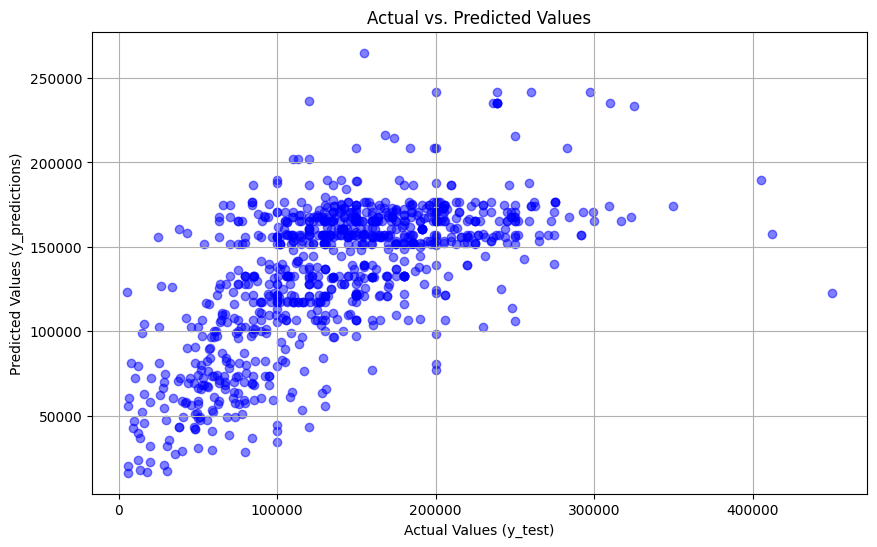

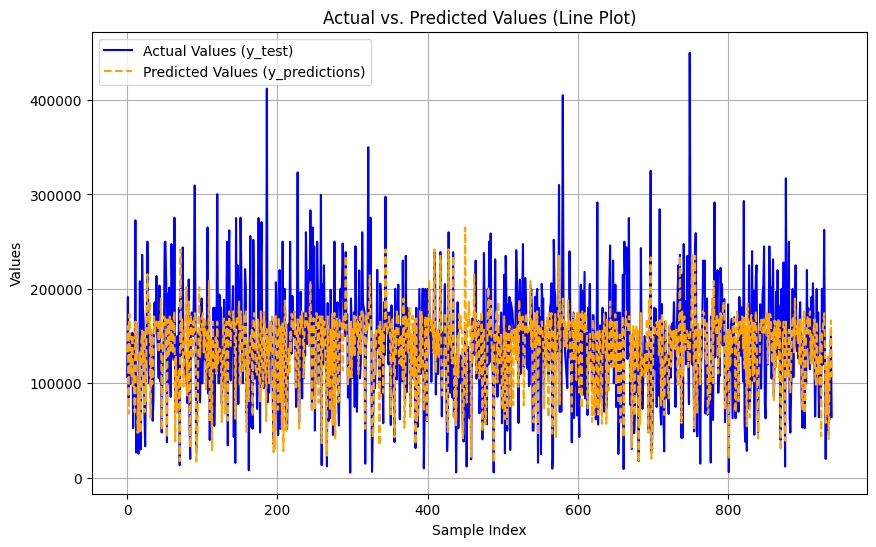

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predictions, color='blue', alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_predictions)')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Line plot (for trend comparison)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values (y_test)', color='blue')
plt.plot(y_predictions, label='Predicted Values (y_predictions)', color='orange', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()
